Referensi: https://keras.io/examples/mnist_cnn/

Pada referensi ini melakukan klasifikasi pada data hand written digits MNIST.

Kita mencoba menggunakan arsitektur tersebut untuk melakukan klasifikasi pada data fashion MNIST

# Requirement

## Show hardware CPU and GPU

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13486965362375698335, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12987127345130141349
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 708344793275027670
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13220803380
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16431466814528798927
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

##Import library

In [0]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


#Data

Data to use = fashion_mnist

## Data Parameters

In [0]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# initialize the label names
class_names = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

## Get data and split train test

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train_original, y_train_original), (x_test_original, y_test_original) = (x_train, y_train), (x_test, y_test)
print("train feature shape = ", x_train.shape)
print("train label shape = ", y_train.shape)
print("test feature shape = ", x_test.shape)
print("test label shape = ", y_test.shape)

train feature shape =  (60000, 28, 28)
train label shape =  (60000,)
test feature shape =  (10000, 28, 28)
test label shape =  (10000,)


## Preprocess

###Keras Backend default image data format convention

In [0]:
#Keras backend has default image data format convention
#so we reshape our data to adjust with this format convention
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print("train feature shape = ", x_train.shape)
print("test feature shape = ", x_test.shape)

train feature shape =  (60000, 28, 28, 1)
test feature shape =  (10000, 28, 28, 1)


### Scale data

In [0]:
# scale data to the range of [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

### Convert class vectors to binary class matrices (one-hot encode)

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Model

## Architecture

We use CNN with Architecture:
    
- Input -> [batch_size, 28, 28, 1]
- Convolutional layer 1 (Apply 32 filter of [3x3])  -> [batch_size, 28, 28, 32]
- ReLU 1  -> [?, 28, 28, 32]
- Convolutional layer 2 (Apply 64 filter of [3x3])  -> [batch_size, 28, 28, 64]
- ReLU 2  -> [?, 14, 14, 64] 
- Max pooling (2x2)  -> [?, 7, 7, 64] 
- Drop Out (0.25)  -> [?, 7, 7, 64] 
- Flatten -> [1x3136]
- Fully connected -> [1x128]
- ReLU 3  -> [1x128] 
- Drop Out (0.5)  -> [1x128]
- Fully connected -> [1x10]
- Softmax -> [1x10] 

Optimizer = Adagrad


## Model Parameters

In [0]:
batch_size = 128
epochs = 100
learn_rate = 0.01

## Create model

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W0818 23:11:03.038603 140153779451776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 23:11:03.043632 140153779451776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 23:11:03.048498 140153779451776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 23:11:03.082951 140153779451776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0818 23:11:03.085900 140153779451776 deprecation_wrapp

## Compile Model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(lr=learn_rate),
              metrics=['accuracy'])

W0818 23:11:03.184296 140153779451776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 23:11:03.194082 140153779451776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Training

##Train the model

In [0]:
model_train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)

W0818 23:11:03.316714 140153779451776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 7s 124us/step - loss: 0.5057 - acc: 0.8261 - val_loss: 0.3184 - val_acc: 0.8833
Epoch 2/100
54000/54000 [==============================] - 4s 69us/step - loss: 0.3352 - acc: 0.8815 - val_loss: 0.2842 - val_acc: 0.8988
Epoch 3/100
54000/54000 [==============================] - 4s 69us/step - loss: 0.2987 - acc: 0.8958 - val_loss: 0.2602 - val_acc: 0.9035
Epoch 4/100
54000/54000 [==============================] - 4s 69us/step - loss: 0.2747 - acc: 0.9032 - val_loss: 0.2534 - val_acc: 0.9073
Epoch 5/100
54000/54000 [==============================] - 4s 69us/step - loss: 0.2590 - acc: 0.9076 - val_loss: 0.2439 - val_acc: 0.9107
Epoch 6/100
54000/54000 [==============================] - 4s 69us/step - loss: 0.2460 - acc: 0.9131 - val_loss: 0.2385 - val_acc: 0.9115
Epoch 7/100
54000/54000 [==============================] - 4s 69us/step - loss: 0.2356 - acc: 0.9160 - val_loss: 0.2290 - 

## Visualize the model result

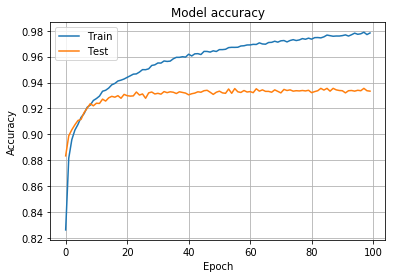

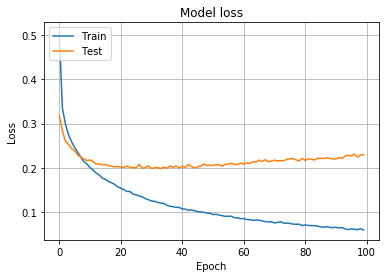

In [0]:
# Plot training & validation accuracy values
plt.plot(model_train_history.history['acc'])
plt.plot(model_train_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(model_train_history.history['loss'])
plt.plot(model_train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

# Testing and Visualisation

## Precission and Recall

In [0]:
#Accuracy and Loss
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.24409902872666717
Test accuracy: 0.9316


In [0]:
#memprediksi label kelas
predictions_labels = model.predict_classes(x_test)
print(classification_report(y_test_original,predictions_labels))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.91      0.89      1000
           3       0.93      0.94      0.94      1000
           4       0.90      0.88      0.89      1000
           5       0.99      0.99      0.99      1000
           6       0.82      0.78      0.80      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



##Confusion Matrix

Confusion matrix, without normalization
[[891   1  18  12   1   1  71   0   5   0]
 [  0 988   1   6   1   0   2   0   2   0]
 [ 16   1 909   6  27   0  39   0   2   0]
 [ 10   1  10 942  15   0  20   0   2   0]
 [  1   0  53  22 884   0  39   0   1   0]
 [  0   0   0   0   0 990   0   8   0   2]
 [ 89   1  42  19  58   0 782   0   9   0]
 [  0   0   0   0   0   6   0 980   0  14]
 [  3   1   0   5   1   2   1   4 983   0]
 [  1   0   0   0   0   5   0  27   0 967]]


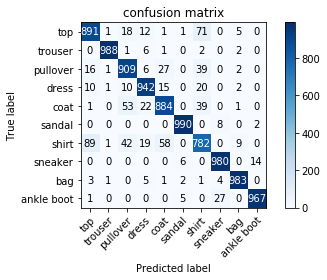

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot confusion matrix
plot_confusion_matrix(y_test_original, predictions_labels, classes=class_names, normalize=False,
                      title='confusion matrix')

## True and False Predicition Visualisation

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(True)
  plt.xticks(range(0,10,1))
  #plt.yticks(range(0,11,0.1))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
#memprediksi label kelas
predictions_labels = model.predict_classes(x_test)
true_predict_labels = predictions_labels==y_test_original
false_predict_labels = predictions_labels!=y_test_original

#memecah feature menjadi feature yang benar diprediksi dan salah diprediksi
true_x_test = x_test_original[true_predict_labels]
false_x_test = x_test_original[false_predict_labels]

#memecah label menjadi label yang benar diprediksi dan salah diprediksi
true_y_test = y_test_original[true_predict_labels]
false_y_test = y_test_original[false_predict_labels]

#memprediksi probability kelas
predictions_probability = model.predict(x_test)

#memecah probability prediksi menjadi probability prediksi berdasarkan label yg benar dan label yang salah diprediksi
true_probability_predict_test = predictions_probability[true_predict_labels]
false_probability_predict_test = predictions_probability[true_predict_labels]

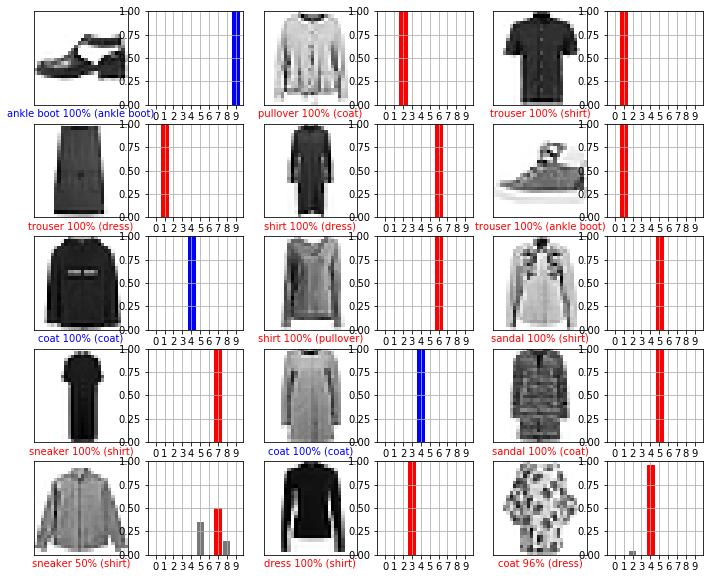

In [25]:
#menampilkan beberapa image mana yang salah diprediksi
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, false_probability_predict_test[i], false_y_test, false_x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, false_probability_predict_test[i], false_y_test)
plt.show()


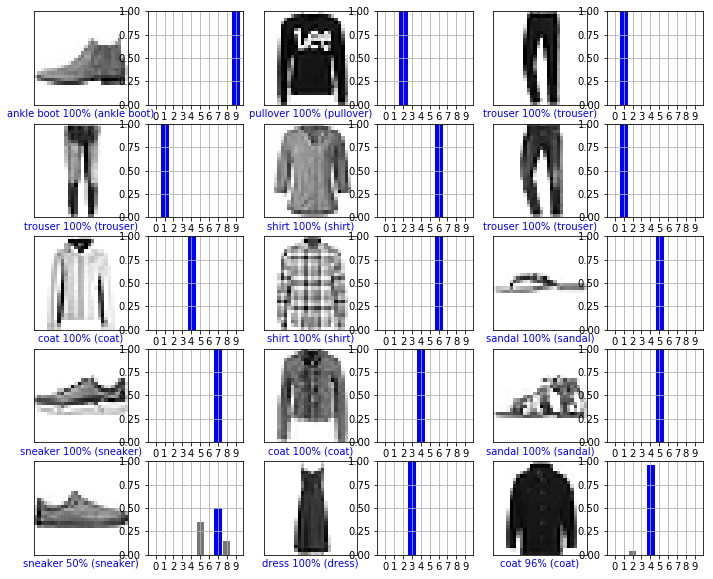

In [0]:
#menampilkan beberapa image mana yang benar diprediksi
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, true_probability_predict_test[i], true_y_test, true_x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, true_probability_predict_test[i], true_y_test)
plt.show()

# Evaluation

##Akurasi

Hasil pengujian pada data test adalah sebagai berikut:
- Test loss: 0.24409902872666717
- Test accuracy: 0.9316

Pada epoch 100, akurasi dan loss yang didapat adalah sebagai berikut:
- Train loss: 0.0606 
- Train accuracy: 0.9783
- Validation Loss: 0.2300 
- Val accuracy: 0.9333

Perbedaan train accuracy dengan validation accuracy pada epoch 100 cukup signifikan yaitu sebesar 0.3, dan perbedaan loss sebesar 0.17. Hal ini dapat dikatakan overfitted, karena akurasi validasi lebih kecil dibanding train. Jika membutuhkan akurasi yang tinggi tapi dengan komputasi yang memadai, epoch 100 dapat dilakukan.

Dari [Visualisasi Hasil Training](#visualize-the-model-result), epoch yang optimal agar akurasi cukup baik tetapi tidak membutuhkan banyak waktu adalah epoch 8 dengan akurasi dan loss sebagai berikut:
- Train loss: 0.2126 
- Train accuracy: 0.9243
- Validation Loss: 0.2163 
- Val accuracy: 0.9202

Dari [Visualisasi Hasil Training](#visualize-the-model-result), akurasi dan loss di atas epoch 67 cukup stagnan, artinya semakin banyak epoch di atas 67 tidak meningkatkan akurasi. Proses training dapat cukup dilakukan sampai epoch 67.

##Hasil Prediksi

Berdasarkan table confusion matrix, dapat dilihat bahwa kelas yang paling baik diprediksi adalah kelas "sandals".

Kelas yang paling buruk diprediksi adalah kelas "shirt". Data yang adalah sebenarnya kelas "shirt", salah diprediksi menjadi kelas lain yg mirip dengan "shirt". Juga data yang sebenarnya bukan kelas "shirt" diprediksi menjadi kelas "shirt". 

Dari visualisasi gambar yang salah diprediksi, kesalahan prediksi pada model dikarenakan gambar suatu kelas yang terlalu mirip dengan gambar kelas lainnya. Contohnya "shirt" yang agak mirip dengan "top", "pullover", dan "dress". 

Kesalahan prediksi juga dikarenakan data memiliki resolusi yang terlalu kecil.